In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn import linear_model


In [38]:
train=pd.read_csv("data/train.csv")

In [39]:
test=pd.read_csv("data/test.csv")

In [40]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
reg=linear_model.LinearRegression()

In [42]:
#style of plotting is set at a global level
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [43]:
train.SalePrice.skew()

1.8828757597682129

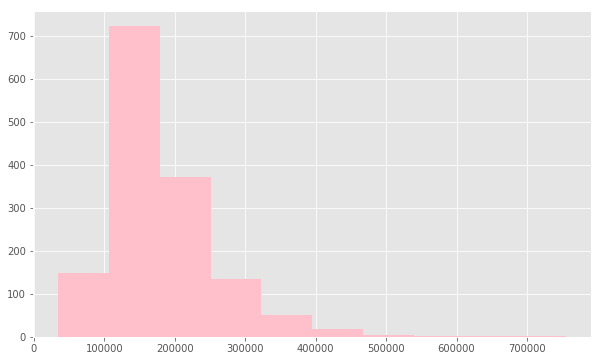

In [44]:
plt.hist(train.SalePrice, color='pink')
plt.show()

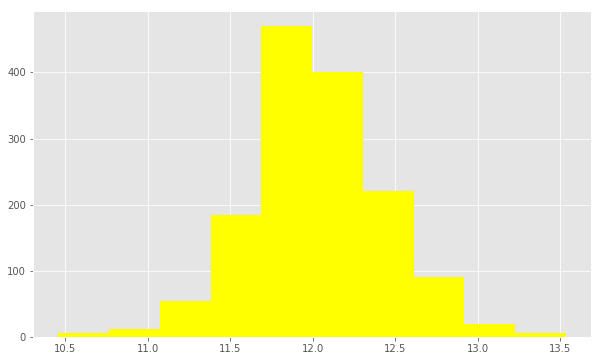

In [45]:
target= np.log(train.SalePrice)
plt.hist(target, color='yellow')
plt.show()


In [46]:
target.skew()


0.12133506220520406

In [47]:
numeric_features = train.select_dtypes(include=[np.number])

In [48]:
corr=numeric_features.corr()

In [49]:
#top 5(most related) directly related to sale price 
corr['SalePrice'].sort_values(ascending=False)[:5]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [50]:
#top 5(from bottom most inversely related) directly related to sale price, greater the negative value lesser does sp gets with that relation 
corr['SalePrice'].sort_values(ascending=False)[-5:]


YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

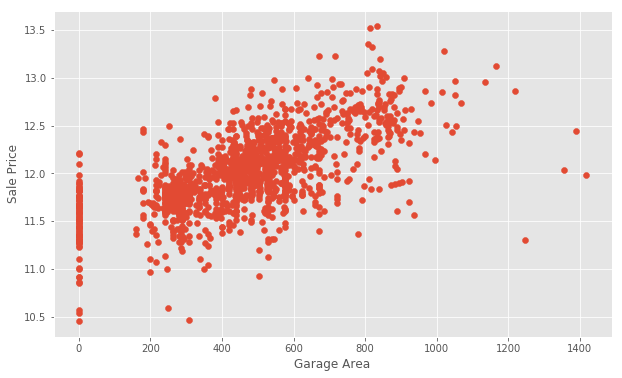

In [51]:
plt.scatter(x=train['GarageArea'], y= target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show

In [52]:
train=train[train['GarageArea']<1200]

<function matplotlib.pyplot.show(*args, **kw)>

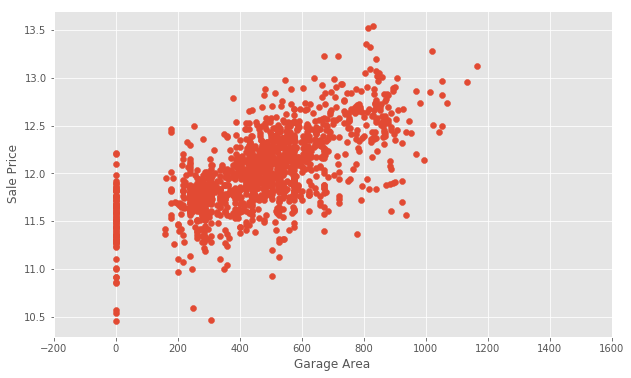

In [53]:
plt.scatter(x=train['GarageArea'], y = np.log(train.SalePrice))
plt.xlim(-200, 1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show

In [54]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['Null Count']
nulls.index.name='Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [55]:
categoricals= train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [56]:
train.Street.value_counts()

Pave    1450
Grvl       5
Name: Street, dtype: int64

In [57]:
train['enc_street']= pd.get_dummies(train.Street, drop_first='True')
test['enc_street']= pd.get_dummies(test.Street, drop_first='True')
train.enc_street.value_counts()



1    1450
0       5
Name: enc_street, dtype: int64

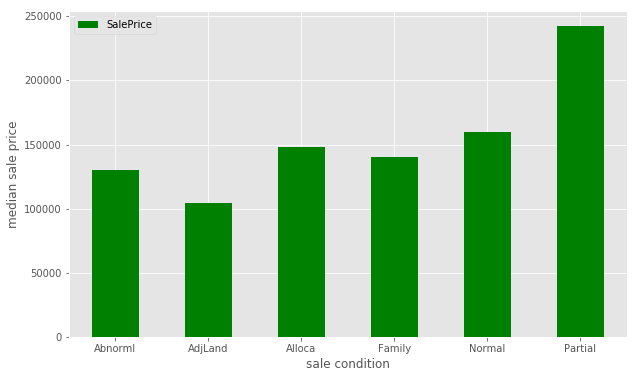

In [58]:
condition_pivot=train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('sale condition')
plt.ylabel('median sale price')
plt.xticks(rotation=0)
plt.show()

In [59]:
#defining a function encode
def encode(x) : return 1 if x=='Partial' else 0
train['enc_condition']= train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)

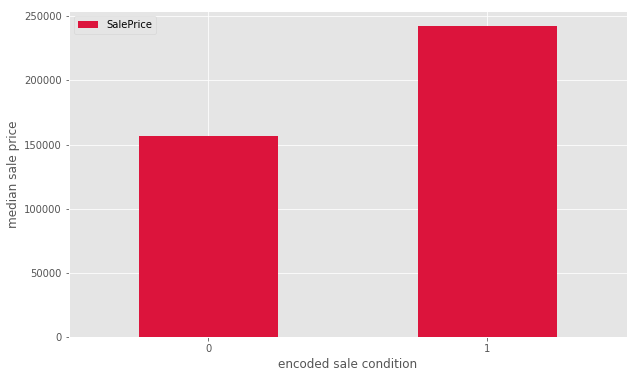

In [60]:
condition_pivot=train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='crimson')
plt.xlabel('encoded sale condition')
plt.ylabel('median sale price')
plt.xticks(rotation=0)
plt.show()

In [61]:
#fill missing values with average values(called interpolate)and assigning result to data
data= train.select_dtypes(include=[np.number]).interpolate().dropna() 

In [62]:
y=np.log(train.SalePrice)
x=data.drop(['SalePrice', 'Id'], axis=1)

In [63]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, test_size=.33)

In [64]:
lr= linear_model.LinearRegression()

In [65]:
model=lr.fit(x_train, y_train)

In [66]:
#returns the r-squared value by default
model.score(x_test, y_test)

0.8882477709262531

In [67]:
predictions= model.predict(x_test)


In [68]:
#rmse
mean_squared_error(y_test, predictions)

0.01784179451956794

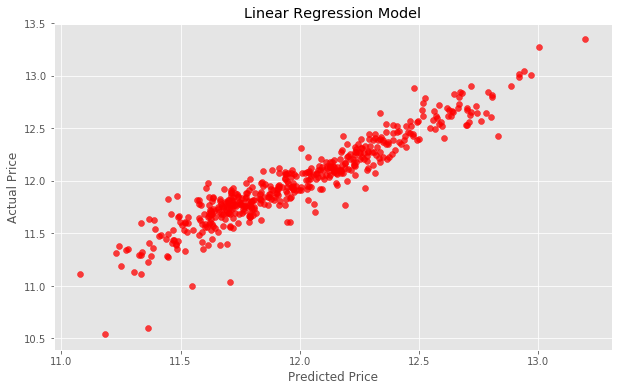

In [69]:
#alpha helps to show overlapping data
actual_values=y_test
plt.scatter(predictions, actual_values, alpha = .75, color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

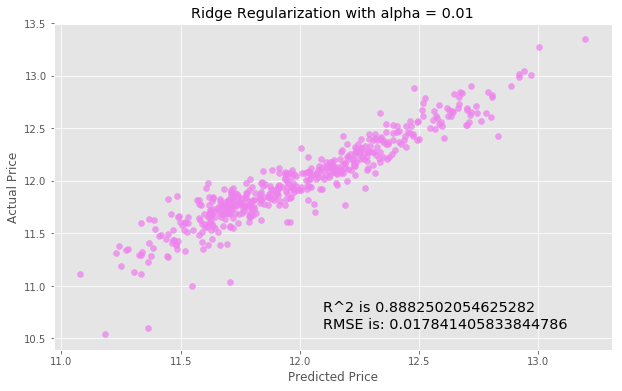

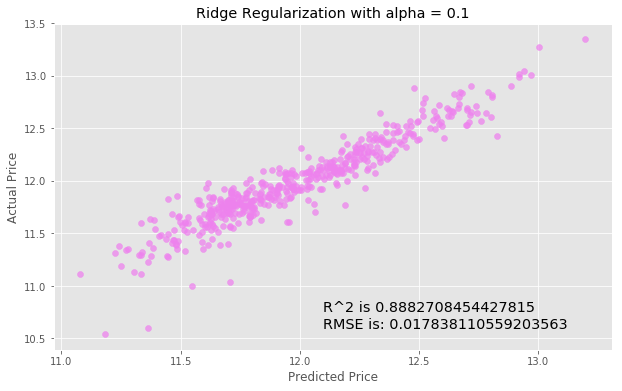

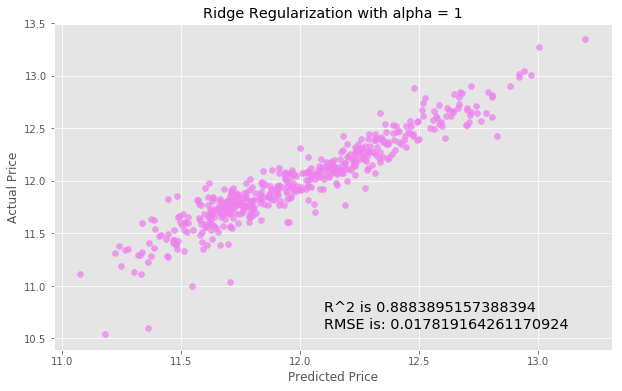

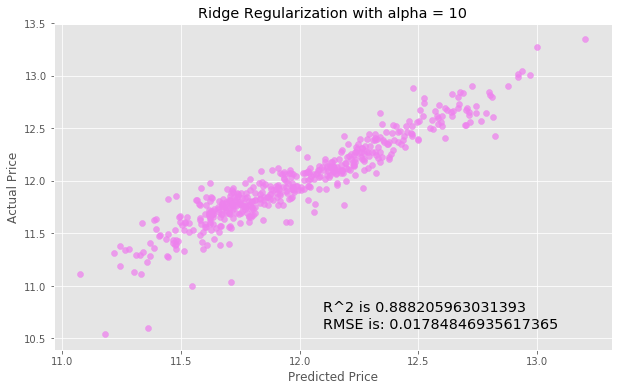

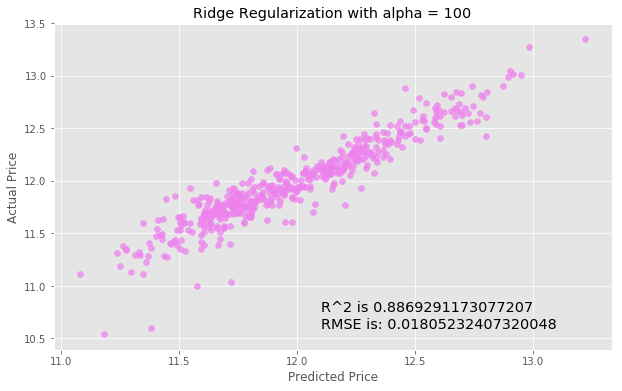

In [88]:
#improve the model as line should have appeared y=x
#apply ridge regularization : shrinks the regression coefficients of less important features
#it uses alpha to control the strength of regularization
for i in range (-2, 3):
    alpha = 10**i
    rm=linear_model.Ridge(alpha)
    ridge_model=rm.fit(x_train, y_train)
    preds_ridge=ridge_model.predict(x_test)
    plt.scatter(preds_ridge, actual_values, alpha =.75, color='violet')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is {} \nRMSE is: {}'.format(ridge_model.score(x_test, y_test), mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(12.1, 10.6), size='x-large')
    plt.show()
    #annotate is used to show labels of RMSE and R^2 in the graphs

In [94]:
#submissions=pd.DataFrame()
#submissions['Id']= test.Id
feats= test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [95]:
predictions=model.predict(feats)

In [96]:
final_predictions=np.exp(predictions)

In [97]:
print("Original predictions are :\n", predictions[:10], "\n")#log values
print("Fiinal predictions are :\n", final_predictions[:10])#converted back to exponential final answers

Original predictions are :
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655 12.05709882
 12.16036698 12.01665734 12.17126892 11.66318882] 

Fiinal predictions are :
 [128959.49172585 122920.74024358 175704.82598102 200050.83263755
 182075.46986405 172318.33397533 191064.621642   165488.55901671
 193158.99133191 116214.02546462]


In [98]:
submission = pd.DataFrame({
    "Id": test.Id, 
    "SalePrice": final_predictions
})
submission.to_csv('submission1.csv', index=False)


In [99]:
#submissions['SalePrice']=final_predictions

In [100]:
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [106]:
submissions.to_csv('submission1.csv', index=False)#index=false else pandas will create a new index for us in .csv file

In [107]:
t=pd.read_csv("submission1.csv")

In [109]:
t


,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864
5,1466,172318.333975
6,1467,191064.621642
7,1468,165488.559017
8,1469,193158.991332
9,1470,116214.025465
